# Debugging Benchmark Failures

In [57]:
import pathlib
import typing

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from labm8 import pbutil
from labm8 import viz
from labm8 import labdate
from labm8 import labtypes
from labm8 import prof

from gpu.libcecl.proto import libcecl_pb2
from datasets.benchmarks.gpgpu import gpgpu_pb2

In [58]:
# LOGDIR = pathlib.Path('/var/phd/shared/datasets/benchmarks/gpgpu/logs')
LOGDIR = pathlib.Path('/var/phd/shared/datasets/benchamrks/gpgpu/logs')
assert LOGDIR.is_dir()
!echo $(ls {LOGDIR} | wc -l) files

161 files


In [59]:
with prof.ProfileToStdout():
    logs = [pbutil.FromFile(log, gpgpu_pb2.GpgpuBenchmarkRun())
                            for log in LOGDIR.iterdir()]

completed in 1.812 seconds (started a second ago)


In [60]:
error_logs = [log for log in logs if log.run.returncode]
print(len(error_logs), 'of', len(logs), 'failed')

53 of 161 failed


In [61]:
error_logs[0]

benchmark_suite: "rodinia-3.1"
benchmark_name: "hybridsort"
dataset_name: "default"
hostname: "cc1"
run {
  ms_since_unix_epoch: 1551447232419
  returncode: 1
  cecl_log: ""
  stdout: "Sorting list of 1000000 floats.\nError: Failed to create a device group!\n"
  stderr: ""
  device {
    name: "GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2"
    platform_name: "NVIDIA CUDA"
    device_name: "GeForce GTX 1080"
    driver_version: "396.37"
    opencl_version: "1.2"
    device_type: "GPU"
    platform_id: 0
    device_id: 1
  }
  elapsed_time_ms: 520
}

In [62]:
df = pd.DataFrame([
    (log.benchmark_suite, log.benchmark_name, log.dataset_name, log.run.device.name, log.run.returncode, log.run.stdout, log.run.stderr)
    for log in error_logs
], columns = ['suite', 'benchmark', 'dataset', 'device', 'returncode', 'stdout', 'stderr'])
df

,suite,benchmark,dataset,device,returncode,stdout,stderr
0,rodinia-3.1,hybridsort,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,1,Sorting list of 1000000 floats.\nError: Failed...,
1,amd-app-sdk-3.0,Histogram,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,Platform 0 : NVIDIA Corporation\nPlatform 1 : ...,
2,npb-3.3,cg.A,A,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,\n\n NAS Parallel Benchmarks (NPB3.3-OCL) - CG...,
3,nvidia-4.2,Reduction,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,[oclReduction] starting...\n\n/tmp/phd_dataset...,
4,parboil-0.2,spmv.small,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,3,Resolving OpenCL library...\nLD_LIBRARY_PATH=:...,"File ""tools/compare-output"", line 27\nprint ""F..."
5,npb-3.3,cg.W,W,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,\n\n NAS Parallel Benchmarks (NPB3.3-OCL) - CG...,
6,nvidia-4.2,HiddenMarkovModel,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,[oclHiddenMarkovModel] starting...\n\nclGetPla...,
7,rodinia-3.1,streamcluster,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,PARSEC Benchmark Suite\n--cambine: device name...,
8,parboil-0.2,histo.default,default,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,1,Resolving OpenCL library...\nLD_LIBRARY_PATH=:...,unknown err code!\nmake: *** [run] Error 101
9,npb-3.3,cg.S,S,GPU|NVIDIA|GeForce_GTX_1080|396.37|1.2,101,\n\n NAS Parallel Benchmarks (NPB3.3-OCL) - CG...,


In [66]:
print(df.iloc[4].stderr)

File "tools/compare-output", line 27
print "Fail at row %d: (gold) %f != %f (computed)" % (row, r, c)
^
SyntaxError: invalid syntax


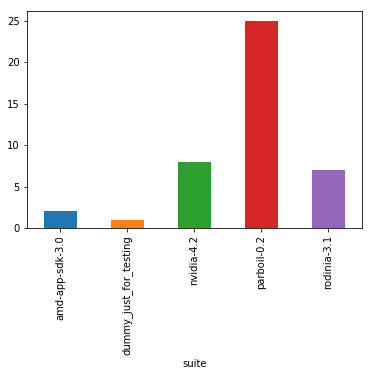

In [54]:
df.groupby('suite')['stdout'].count().plot.bar()

In [19]:
l = error_logs[1].run
l

ms_since_unix_epoch: 1551106950408
returncode: 255
cecl_log: ""
stdout: "WG size of kernel = 16 \nERROR: CECL_CREATE_CONTEXT_FROM_TYPE(GPU) failed\n"
stderr: ""
device {
  name: "GPU|NVIDIA_CUDA|GeForce_GTX_1080|396.37|1.2"
  platform_name: "NVIDIA CUDA"
  device_name: "GeForce GTX 1080"
  driver_version: "396.37"
  opencl_version: "1.2"
  device_type: "GPU"
  platform_id: 0
  device_id: 1
}
elapsed_time_ms: 95

In [18]:
print(l.stdout)
print(l.stderr)

WG size of kernel = 16 
ERROR: CECL_CREATE_CONTEXT_FROM_TYPE(GPU) failed


